# Tensorflow for binary classification task
### Using Breast Cancer Dataset from: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
This is a simple implementation of ANN for a binary classification task with purely numerical features.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
df=pd.read_csv('C:/Users/user/Documents/coding/Breast cancer/data.csv')

In [71]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocessing:
1) Convert diagnosis (target) to binary variable
2) Split into predictors (x) and target (y)

In [72]:
y = df.loc[:,'diagnosis'].replace({'M':1, 'B':0})
x = df.drop(columns=['id', 'diagnosis'])

Split into training and test sets:

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

## Models
#### ANN Model:
- Batch Normalisation on first layer
- 16 nodes with SELU activation function
- Output layer uses sigmoid activation function
- Adam optimiser, binary crossentropy loss function
- Minibatch gradient descent (size 32) with early stopping

In [74]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

inputshape = [x_train.shape[1]]

In [102]:
ANNmodel = Sequential([
    BatchNormalization(input_shape=inputshape),
    Dense(16, kernel_initializer='lecun_normal', activation='selu'),
    Dense(1)
])

ANNmodel.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits = True),
              metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

Best Validation Loss: 0.06039 
Best Validation Accuracy: 0.97661


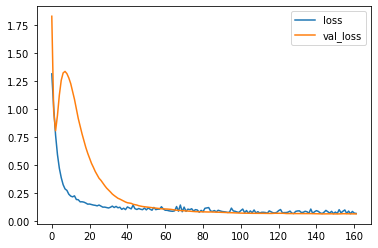

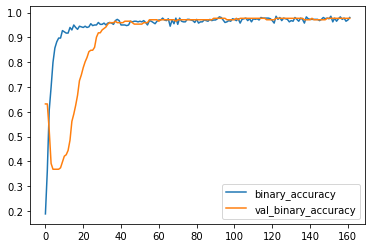

In [103]:
ANNfit = ANNmodel.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

ANNdf = pd.DataFrame(ANNfit.history)
ANNdf.loc[:, ['loss', 'val_loss']].plot()
ANNdf.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(f"Best Validation Loss: {round(ANNdf['val_loss'].min(),5)} \nBest Validation Accuracy: {round(ANNdf['val_binary_accuracy'].max(),5)}")